In [1]:
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Data maken m.b.v. moons

In [2]:
X, y = make_moons(n_samples=500, noise=0.30, random_state=42)

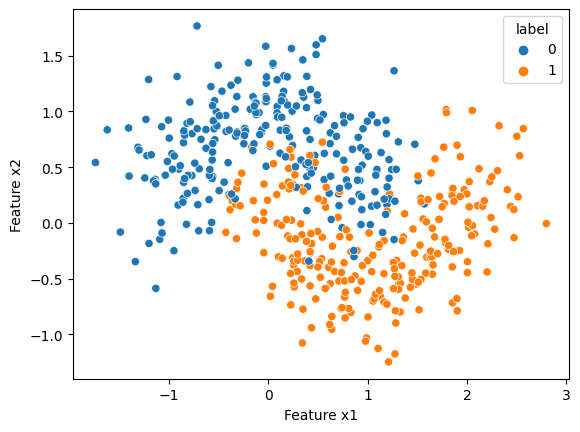

In [3]:
df = pd.DataFrame(X)
df["label"] = y
sns.scatterplot(data=df, x=0, y=1, hue="label")
plt.xlabel("Feature x1")
plt.ylabel("Feature x2")
plt.show()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Ensemble aanmaken

In [5]:
voting_clf = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('svc', SVC(random_state=42))
    ]
)
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

## Losse scores

In [6]:
for name, clf in voting_clf.named_estimators_.items():
    print(name, "=", clf.score(X_test, y_test))

lr = 0.864
rf = 0.896
svc = 0.896


In [7]:
X_test[:1]

array([[0.50169252, 0.21717211]])

In [8]:
voting_clf.predict(X_test[:1])

array([1], dtype=int64)

In [9]:
[clf.predict(X_test[:1]) for clf in voting_clf.estimators_]

[array([1], dtype=int64), array([1], dtype=int64), array([0], dtype=int64)]

## Hard voting

In [10]:
voting_clf.score(X_test, y_test)

0.912

## Soft voting
Hiervoor is het eerst nodig om de SVC om te zetten zodat hij probabilities terug gaat geven (i.p.v. 0 of 1)

In [11]:
voting_clf.named_estimators["svc"].probability = True

In [12]:
voting_clf.voting = "soft"
voting_clf.fit(X_train, y_train)
voting_clf.score(X_test, y_test)

0.92